# Supervised Learning Capstone

Used cars are often sold to used car dealerships in auctions, which they then sell to customers. However, sometimes cars purchased in an auction come with serious issues. Dealers that buy these cars will need to spend time and money to deal with cars with these issues. Some of these issues are tampered odometers, mechanical issues the dealer is not able to address, issues with getting the vehicle title from the seller, or some other unforeseen problems.

The purpose of this capstone project is to be able to predict if a car sold at an auction to used car dealerships will have 
serious issues that prevent it from being sold to customers. The data can be found [here](https://www.kaggle.com/c/DontGetKicked/data).      

In [1]:
from scipy.stats.mstats import winsorize
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn import ensemble
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

## Data Cleaning

First, let's begin by loading the data.

In [2]:
data = pd.read_csv("training.csv") 

To begin data cleaning, we'll take a look at the data types and see if they make sense.

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 34 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
PurchDate                            72983 non-null object
Auction                              72983 non-null object
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
Make                                 72983 non-null object
Model                                72983 non-null object
Trim                                 70623 non-null object
SubModel                             72975 non-null object
Color                                72975 non-null object
Transmission                         72974 non-null object
WheelTypeID                          69814 non-null float64
WheelType                            69809 non-null object
VehOdo                               72983 non-null int64
Nationalit

The types seem to make sense for the data they are supposed to represent.
Let's move on to null cleaning.

## Null Cleaning

Now let's clean the null values. First, we need to see how many nulls are in the data.

In [4]:
Sum = data.isnull().sum()
Percentage = (data.isnull().sum()/data.isnull().count()*100)

pd.concat([Sum,Percentage], axis =1, keys= ['Sum', 'Percentage'])

,Sum,Percentage
RefId,0,0.000000
IsBadBuy,0,0.000000
PurchDate,0,0.000000
Auction,0,0.000000
VehYear,0,0.000000
VehicleAge,0,0.000000
Make,0,0.000000
Model,0,0.000000
Trim,2360,3.233630
SubModel,8,0.010961


There are quite a few nulls in the data. Let's impute the mean for the continous variables, and impute a placeholder catergory for the categorical variables.

In [5]:
data.fillna(data.mean(), inplace=True)

In [6]:
data.fillna(("Unknown"), inplace=True)

In [7]:
clean_data = data.copy()

Now to check for nulls.

In [8]:
total = clean_data.isnull().sum().sort_values(ascending=False)
percent = (clean_data.isnull().sum()*100/clean_data.isnull().count()).sort_values(ascending = False)
missing_values = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_values.head(20)

,Total,Percent
WarrantyCost,0,0.0
Trim,0,0.0
VehOdo,0,0.0
WheelType,0,0.0
WheelTypeID,0,0.0
Transmission,0,0.0
Color,0,0.0
SubModel,0,0.0
Model,0,0.0
IsOnlineSale,0,0.0


All of them are gone! Let's move on.

## Outlier Cleaning

To start with outlier cleaning, let's first select our variables that aren't categorical.

In [9]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

numericsdata = clean_data.select_dtypes(include=numerics)

In [10]:
numericsdata

,RefId,IsBadBuy,VehYear,VehicleAge,WheelTypeID,VehOdo,MMRAcquisitionAuctionAveragePrice,MMRAcquisitionAuctionCleanPrice,MMRAcquisitionRetailAveragePrice,MMRAcquisitonRetailCleanPrice,MMRCurrentAuctionAveragePrice,MMRCurrentAuctionCleanPrice,MMRCurrentRetailAveragePrice,MMRCurrentRetailCleanPrice,BYRNO,VNZIP1,VehBCost,IsOnlineSale,WarrantyCost
0,1,0,2006,3,1.000000,89046,8155.0,9829.0,11636.0,13600.0,7451.0,8552.0,11597.0,12409.0,21973,33619,7100.0,0,1113
1,2,0,2004,5,1.000000,93593,6854.0,8383.0,10897.0,12572.0,7456.0,9222.0,11374.0,12791.0,19638,33619,7600.0,0,1053
2,3,0,2005,4,2.000000,73807,3202.0,4760.0,6943.0,8457.0,4035.0,5557.0,7146.0,8702.0,19638,33619,4900.0,0,1389
3,4,0,2004,5,1.000000,65617,1893.0,2675.0,4658.0,5690.0,1844.0,2646.0,4375.0,5518.0,19638,33619,4100.0,0,630
4,5,0,2005,4,2.000000,69367,3913.0,5054.0,7723.0,8707.0,3247.0,4384.0,6739.0,7911.0,19638,33619,4000.0,0,1020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72978,73010,1,2001,8,1.000000,45234,1996.0,2993.0,2656.0,3732.0,2190.0,3055.0,4836.0,5937.0,18111,30212,4200.0,0,993
72979,73011,0,2007,2,1.494299,71759,6418.0,7325.0,7431.0,8411.0,6785.0,8132.0,10151.0,11652.0,18881,30212,6200.0,0,1038
72980,73012,0,2005,4,1.000000,88500,8545.0,9959.0,9729.0,11256.0,8375.0,9802.0,11831.0,14402.0,18111,30212,8200.0,0,1893
72981,73013,0,2006,3,1.000000,79554,6420.0,7604.0,7434.0,8712.0,6590.0,7684.0,10099.0,11228.0,18881,30212,7000.0,0,1974


Now we'll use Tukey's method to detect outliers. We'll define outliers as points that are more than 1.5 standard deviations away from the mean.

In [11]:
for variable in numericsdata:
    q75, q25 = np.percentile(clean_data[variable], [75 ,25])
    iqr = q75 - q25

    min_val = q25 - (iqr*1.5)
    max_val = q75 + (iqr*1.5)
    print("Number of outliers and percentage of it in {} : {} and {}".format(variable,
len((np.where((clean_data[variable] > max_val) | 
(clean_data[variable] < min_val))[0])),len((np.where((clean_data[variable] > max_val) | 
(clean_data[variable] < min_val))[0]))*100/72983))

Number of outliers and percentage of it in RefId : 0 and 0.0
Number of outliers and percentage of it in IsBadBuy : 8976 and 12.298754504473644
Number of outliers and percentage of it in VehYear : 0 and 0.0
Number of outliers and percentage of it in VehicleAge : 646 and 0.8851376347916639
Number of outliers and percentage of it in WheelTypeID : 0 and 0.0
Number of outliers and percentage of it in VehOdo : 336 and 0.4603811846594412
Number of outliers and percentage of it in MMRAcquisitionAuctionAveragePrice : 526 and 0.7207157831275777
Number of outliers and percentage of it in MMRAcquisitionAuctionCleanPrice : 841 and 1.152323143745804
Number of outliers and percentage of it in MMRAcquisitionRetailAveragePrice : 318 and 0.4357179069098283
Number of outliers and percentage of it in MMRAcquisitonRetailCleanPrice : 1261 and 1.7277996245701053
Number of outliers and percentage of it in MMRCurrentAuctionAveragePrice : 582 and 0.7974459805708178
Number of outliers and percentage of it in MMR

We'll use winsorization with the continuous variables. After that, the old variables will be dropped and the winsorized variables will be added to our Dataframe.

In [12]:
VehicleAge_Winsorized = winsorize(clean_data["VehicleAge"], (0, 0.05))
VehOdo_Winsorized = winsorize(clean_data["VehOdo"], (0.05, 0.05))
MMRAcquisitionAuctionAveragePrice_Winsorized = winsorize(clean_data["MMRAcquisitionAuctionAveragePrice"], (0, 0.01))
MMRAcquisitionAuctionCleanPrice_Winsorized = winsorize(clean_data["MMRAcquisitionAuctionCleanPrice"], (0, 0.02))
MMRAcquisitionRetailAveragePrice_Winsorized = winsorize(clean_data["MMRAcquisitionRetailAveragePrice"], (0, 0.02))
MMRAcquisitonRetailCleanPrice_Winsorized = winsorize(clean_data["MMRAcquisitonRetailCleanPrice"], (0.02, 0.02))
MMRCurrentAuctionAveragePrice_Winsorized = winsorize(clean_data["MMRCurrentAuctionAveragePrice"], (0.00, 0.01))
MMRCurrentAuctionCleanPrice_Winsorized = winsorize(clean_data["MMRCurrentAuctionCleanPrice"], (0.02, 0.02))
MMRCurrentRetailAveragePrice_Winsorized = winsorize(clean_data["MMRCurrentRetailAveragePrice"], (0.02, 0.02))
MMRCurrentRetailCleanPrice_Winsorized = winsorize(clean_data["MMRCurrentRetailCleanPrice"], (0.02, 0.02))
VehBCost_Winsorized = winsorize(clean_data["VehBCost"], (0.02, 0.02))
WarrantyCost_Winsorized = winsorize(clean_data["WarrantyCost"], (0.00, 0.02))

In [13]:
clean_data['VehicleAge_Winsorized'] = VehicleAge_Winsorized
clean_data['VehOdo_Winsorized'] = VehOdo_Winsorized
clean_data['MMRAcquisitionAuctionAveragePrice_Winsorized'] = MMRAcquisitionAuctionAveragePrice_Winsorized
clean_data['MMRAcquisitionAuctionCleanPrice_Winsorized'] = MMRAcquisitionAuctionCleanPrice_Winsorized
clean_data['MMRAcquisitionRetailAveragePrice_Winsorized'] = MMRAcquisitionRetailAveragePrice_Winsorized
clean_data['MMRAcquisitonRetailCleanPrice_Winsorized'] = MMRAcquisitonRetailCleanPrice_Winsorized
clean_data['MMRCurrentAuctionAveragePrice_Winsorized'] = MMRCurrentAuctionAveragePrice_Winsorized
clean_data['MMRCurrentAuctionCleanPrice_Winsorized'] = MMRCurrentAuctionCleanPrice_Winsorized
clean_data['MMRCurrentRetailAveragePrice_Winsorized'] = MMRCurrentRetailAveragePrice_Winsorized
clean_data['MMRCurrentRetailCleanPrice_Winsorized'] = MMRCurrentRetailCleanPrice_Winsorized
clean_data['VehBCost_Winsorized'] = VehBCost_Winsorized
clean_data['WarrantyCost_Winsorized'] = WarrantyCost_Winsorized

In [14]:
clean_data = clean_data.drop(['VehicleAge', 'VehOdo','MMRAcquisitionAuctionAveragePrice','MMRAcquisitionAuctionCleanPrice',
                              'MMRAcquisitionRetailAveragePrice','MMRAcquisitonRetailCleanPrice','MMRCurrentAuctionAveragePrice',
                              'MMRCurrentAuctionCleanPrice','MMRCurrentRetailAveragePrice','MMRCurrentRetailCleanPrice',
                              'VehBCost','WarrantyCost'], axis=1)

Now that our outliers are dealt with, we can move on to data exploration.

## Data Exploration

Now we can begin data exploration. Let's first start by using describe(). It will give us a good summary of our data.

In [15]:
clean_data.describe(include='all')

,RefId,IsBadBuy,PurchDate,Auction,VehYear,Make,Model,Trim,SubModel,Color,...,MMRAcquisitionAuctionAveragePrice_Winsorized,MMRAcquisitionAuctionCleanPrice_Winsorized,MMRAcquisitionRetailAveragePrice_Winsorized,MMRAcquisitonRetailCleanPrice_Winsorized,MMRCurrentAuctionAveragePrice_Winsorized,MMRCurrentAuctionCleanPrice_Winsorized,MMRCurrentRetailAveragePrice_Winsorized,MMRCurrentRetailCleanPrice_Winsorized,VehBCost_Winsorized,WarrantyCost_Winsorized
count,72983.000000,72983.000000,72983,72983,72983.000000,72983,72983,72983,72983,72983,...,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
unique,NaN,NaN,517,3,NaN,33,1063,135,864,17,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,11/23/2010,MANHEIM,NaN,CHEVROLET,PT CRUISER,Bas,4D SEDAN,SILVER,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,384,41043,NaN,17248,2329,13950,15236,14875,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,36511.428497,0.122988,NaN,NaN,2005.343052,NaN,NaN,NaN,NaN,NaN,...,6111.980891,7339.469828,8465.850385,9861.587051,6116.671713,7381.425658,8771.478397,10146.669394,6723.805872,1255.570530
std,21077.241302,0.328425,NaN,NaN,1.731252,NaN,NaN,NaN,NaN,NaN,...,2400.213373,2616.347594,3068.010625,3172.641878,2372.309982,2517.130596,2933.877876,3118.931541,1697.682118,510.469546
min,1.000000,0.000000,NaN,NaN,2001.000000,NaN,NaN,NaN,NaN,NaN,...,0.000000,0.000000,0.000000,3763.000000,0.000000,2930.000000,3111.000000,4116.000000,3615.000000,462.000000
25%,18257.500000,0.000000,NaN,NaN,2004.000000,NaN,NaN,NaN,NaN,NaN,...,4273.000000,5407.000000,6281.000000,7494.000000,4285.000000,5425.000000,6550.000000,7796.000000,5435.000000,837.000000
50%,36514.000000,0.000000,NaN,NaN,2005.000000,NaN,NaN,NaN,NaN,NaN,...,6098.000000,7305.000000,8446.000000,9790.000000,6076.000000,7328.000000,8753.000000,10114.000000,6700.000000,1155.000000
75%,54764.500000,0.000000,NaN,NaN,2007.000000,NaN,NaN,NaN,NaN,NaN,...,7765.000000,9021.000000,10650.000000,12088.000000,7732.000000,9006.000000,10897.000000,12308.000000,7900.000000,1623.000000


Let's get a plot of our target variable, IsBadBuy. 0 signifies a car with no serious issues when purchased, while a 1 does.

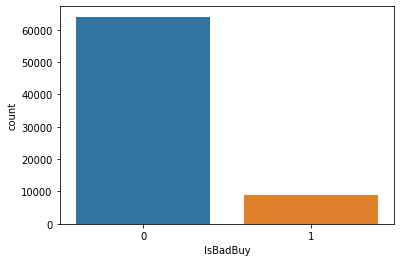

In [16]:
sns.countplot(x='IsBadBuy', data=clean_data)

Now we'll generate histograms and a heatmap of our continuous vairables with our target.

In [17]:
numericsdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72983 entries, 0 to 72982
Data columns (total 19 columns):
RefId                                72983 non-null int64
IsBadBuy                             72983 non-null int64
VehYear                              72983 non-null int64
VehicleAge                           72983 non-null int64
WheelTypeID                          72983 non-null float64
VehOdo                               72983 non-null int64
MMRAcquisitionAuctionAveragePrice    72983 non-null float64
MMRAcquisitionAuctionCleanPrice      72983 non-null float64
MMRAcquisitionRetailAveragePrice     72983 non-null float64
MMRAcquisitonRetailCleanPrice        72983 non-null float64
MMRCurrentAuctionAveragePrice        72983 non-null float64
MMRCurrentAuctionCleanPrice          72983 non-null float64
MMRCurrentRetailAveragePrice         72983 non-null float64
MMRCurrentRetailCleanPrice           72983 non-null float64
BYRNO                                72983 non-null int64
VNZ

In [18]:
continuousdata = clean_data[['IsBadBuy', 'VehicleAge_Winsorized', 'VehOdo_Winsorized', 
                             'MMRAcquisitionAuctionAveragePrice_Winsorized', 
                             'MMRAcquisitionAuctionCleanPrice_Winsorized',
                             'MMRAcquisitionRetailAveragePrice_Winsorized', 
                             'MMRAcquisitonRetailCleanPrice_Winsorized',
                             'MMRCurrentAuctionAveragePrice_Winsorized', 
                             'MMRCurrentAuctionCleanPrice_Winsorized', 
                             'MMRCurrentRetailAveragePrice_Winsorized',
                             'MMRCurrentRetailCleanPrice_Winsorized', 
                             'VehBCost_Winsorized', 
                             'WarrantyCost_Winsorized']].copy()

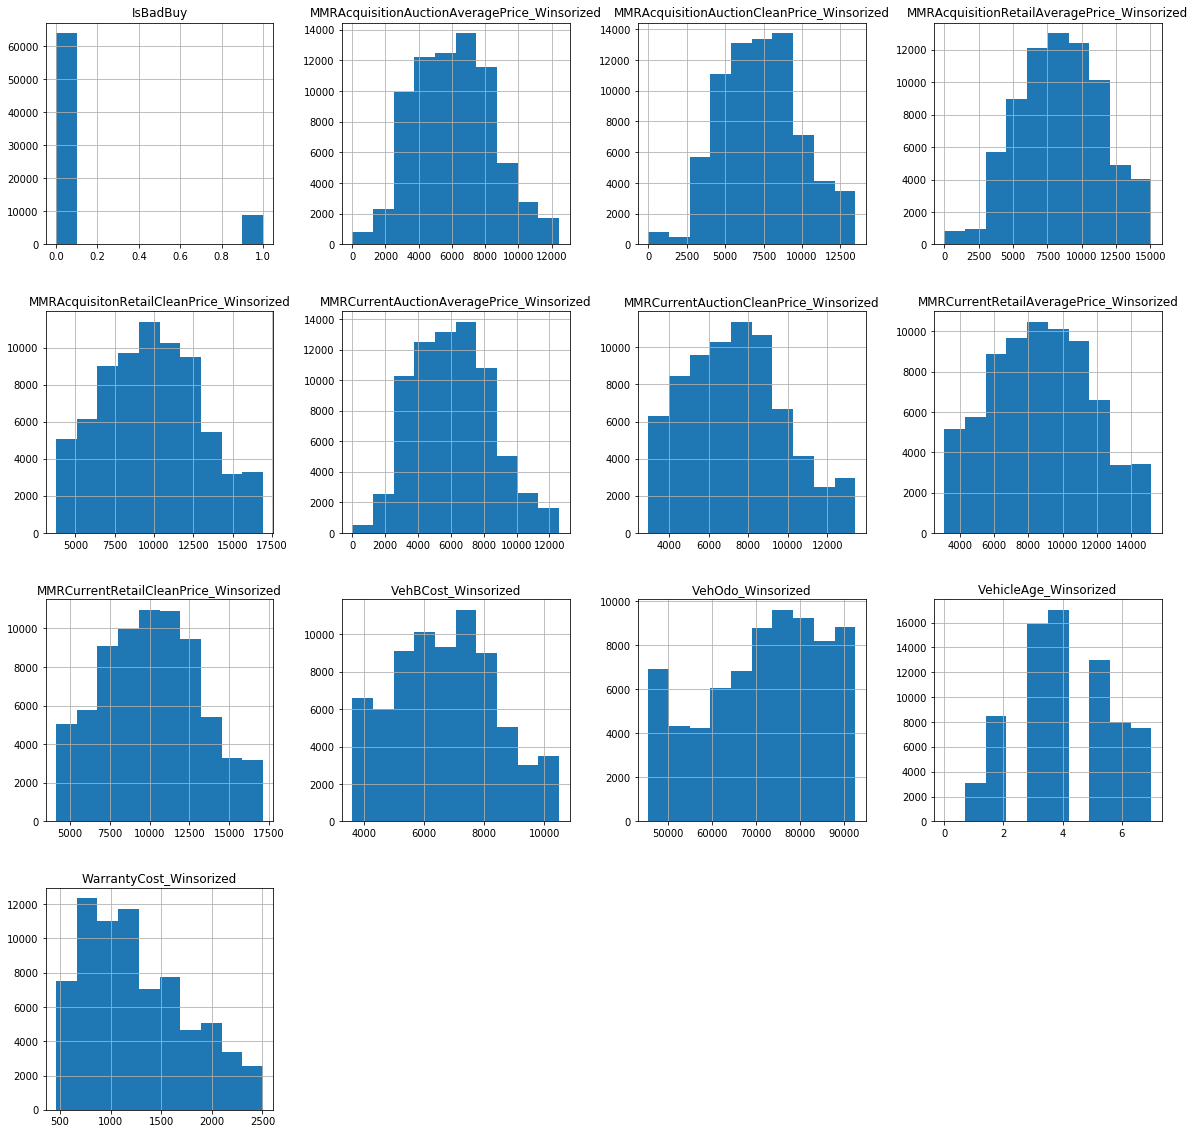

In [19]:
continuousdata.hist(figsize=(20,20))
plt.show()

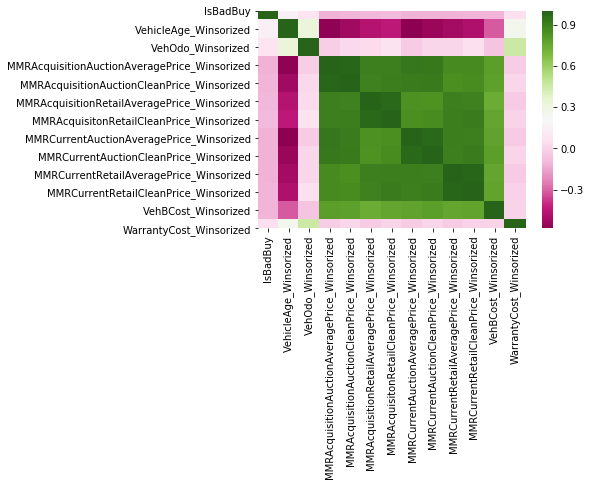

In [20]:
sns.heatmap(continuousdata.corr(), cmap='PiYG')

## Feature Engineering

In feature engineering, we will begin the process of selecting features to include in the model. Before that, we will convert the categorical variables into binary variables, and use PCA to narrow down the number of features we will select.

## Converting Categorical Variables

Categorical variables are sometimes difficult to integrate in models. To fix this, we will turn them into binary variables. However, variables with many unique values will lead to many variables being formed. To limit this, we will not convert variables with more than 30 unique values. First, let's see how many unique variables each categorical variable has.

In [21]:
categorical = clean_data.select_dtypes(include=['object'])
for i in categorical:
    column = categorical[i]
    print(i)
    print(column.nunique())

PurchDate
517
Auction
3
Make
33
Model
1063
Trim
135
SubModel
864
Color
17
Transmission
4
WheelType
4
Nationality
5
Size
13
TopThreeAmericanName
5
PRIMEUNIT
3
AUCGUART
3
VNST
37


Look at the "Model" variable. If we would have hotcoded it, we would have ended up with 1,062 variables being added to our model! We'll drop variables with more than 30 unique values and convert the rest.

In [22]:
clean_data.drop(['PurchDate', 'Make', 'Model', 'Trim', 'SubModel',
            'VNST'], 1, inplace=True)

In [23]:
clean_data = pd.get_dummies(clean_data,drop_first=True)

## PCA

PCA will help us select the best variables for our model. We will generate the eigenvalues, and count the number of eigenvalues higher than 1.

In [24]:
X = StandardScaler().fit_transform(clean_data)

In [25]:
Xt = X.T
Cx = np.cov(Xt)

In [26]:
eig_val_cov, eig_vec_cov = np.linalg.eig(Cx)

In [27]:
print(eig_val_cov)

[ 9.05326334e+00+0.00000000e+00j  3.60000698e+00+0.00000000e+00j
  3.00037409e+00+0.00000000e+00j  2.62168301e+00+0.00000000e+00j
  2.13379011e+00+0.00000000e+00j  1.95318761e+00+0.00000000e+00j
  1.86556118e+00+0.00000000e+00j  1.59579708e+00+0.00000000e+00j
  1.60306082e-01+0.00000000e+00j  2.06276353e-01+0.00000000e+00j
  2.51857745e-01+0.00000000e+00j  2.81590936e-01+0.00000000e+00j
  2.88805009e-01+0.00000000e+00j  3.76517713e-01+0.00000000e+00j
  6.84497995e-02+0.00000000e+00j  5.72111397e-02+0.00000000e+00j
  4.90183080e-02+0.00000000e+00j  2.48662146e-02+0.00000000e+00j
  2.15548665e-02+0.00000000e+00j  1.37298776e-02+0.00000000e+00j
  6.96539253e-03+0.00000000e+00j  3.88655274e-03+0.00000000e+00j
  3.36466763e-03+0.00000000e+00j  2.72568248e-04+0.00000000e+00j
  4.36414759e-01+0.00000000e+00j  1.44225169e+00+0.00000000e+00j
  5.86520971e-01+0.00000000e+00j  1.36523684e+00+0.00000000e+00j
  6.58907310e-01+0.00000000e+00j  1.30376985e+00+0.00000000e+00j
  7.44161168e-01+0.000000

Our variable list can be reduced to 8 featues.

## Feature Selection

We will now decide the features we will include in the model.

In [28]:
corr = clean_data.corr()
corr.head()

,RefId,IsBadBuy,VehYear,WheelTypeID,BYRNO,VNZIP1,IsOnlineSale,VehicleAge_Winsorized,VehOdo_Winsorized,MMRAcquisitionAuctionAveragePrice_Winsorized,...,Size_Unknown,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,TopThreeAmericanName_Unknown,PRIMEUNIT_Unknown,PRIMEUNIT_YES,AUCGUART_RED,AUCGUART_Unknown
RefId,1.000000,0.023973,0.010580,0.012750,0.032896,0.131898,-0.048851,-0.025520,-0.026748,-0.012146,...,0.002475,-0.002609,0.006962,-0.027561,0.005034,0.002475,0.011907,-0.001881,0.007432,0.011907
IsBadBuy,0.023973,1.000000,-0.158886,-0.039243,-0.061488,0.005796,-0.003697,0.163040,0.082043,-0.116373,...,-0.003100,0.003998,0.045829,-0.033072,0.013450,-0.003100,0.056762,-0.002327,-0.002177,0.056762
VehYear,0.010580,-0.158886,1.000000,0.253361,0.280791,0.068276,0.057380,-0.950656,-0.285592,0.589530,...,0.005053,-0.060177,-0.168354,-0.000433,-0.013207,0.005053,-0.009293,0.001285,-0.026981,-0.009293
WheelTypeID,0.012750,-0.039243,0.253361,1.000000,0.183761,0.007720,-0.006531,-0.249779,-0.209791,-0.090890,...,0.004963,0.091769,-0.201354,0.022659,0.046537,0.004963,-0.001892,-0.028270,0.004046,-0.001892
BYRNO,0.032896,-0.061488,0.280791,0.183761,1.000000,0.040260,-0.142444,-0.279991,-0.294993,0.112329,...,-0.002877,-0.001436,-0.113147,-0.047329,-0.068953,-0.002877,-0.005583,-0.003863,0.003643,-0.005583


We currently have 67 possible features. First, let's remove variables that are very highly correlated with each other.   

In [29]:
columns = np.full((corr.shape[0],), True, dtype=bool)
for i in range(corr.shape[0]):
    for j in range(i+1, corr.shape[0]):
        if corr.iloc[i,j] >= 0.9 or corr.iloc[i,j] <= -0.9:
            if columns[j]:
                columns[j] = False

In [30]:
selected_columns = clean_data.columns[columns]
selected_columns.shape

(54,)

In [31]:
clean_data2 = clean_data[selected_columns]

Now we have 54 possible variables. We will see which ones correlate to our target variable the most and select 8 of them.

In [32]:
clean_data2.corr().sort_values(by=['IsBadBuy'],ascending=False)

,RefId,IsBadBuy,VehYear,WheelTypeID,BYRNO,VNZIP1,IsOnlineSale,VehOdo_Winsorized,MMRAcquisitionAuctionAveragePrice_Winsorized,VehBCost_Winsorized,...,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,PRIMEUNIT_Unknown,PRIMEUNIT_YES,AUCGUART_RED
IsBadBuy,0.023973,1.000000,-0.158886,-3.924330e-02,-0.061488,0.005796,-0.003697,0.082043,-0.116373,-0.107121,...,0.007228,-0.015535,0.019691,0.003998,0.045829,-0.033072,0.013450,0.056762,-0.002327,-0.002177
WheelType_Unknown,0.022717,0.377737,-0.039381,-9.844904e-04,-0.003858,-0.014506,0.016589,0.014754,-0.036074,-0.038222,...,-0.000357,-0.003901,0.004719,-0.003361,0.005996,-0.006760,0.012581,0.040278,-0.006218,-0.007019
VehOdo_Winsorized,-0.026748,0.082043,-0.285592,-2.097915e-01,-0.294993,-0.053048,0.030166,1.000000,-0.012946,-0.051143,...,0.026296,0.002431,-0.008799,0.088243,0.162555,0.086334,-0.073994,-0.079667,0.010028,0.038694
PRIMEUNIT_Unknown,0.011907,0.056762,-0.009293,-1.892097e-03,-0.005583,0.011864,-0.022128,-0.079667,0.044932,0.018453,...,-0.003312,-0.000117,0.012889,0.025123,-0.018367,-0.000562,-0.009495,1.000000,-0.131526,-0.148484
WarrantyCost_Winsorized,-0.026534,0.049143,-0.267900,-1.441279e-01,-0.105591,-0.036673,0.006985,0.459791,-0.019300,0.002269,...,-0.046222,0.028419,-0.065864,0.323103,-0.047213,0.377856,-0.398603,-0.009949,-0.001659,0.015838
TopThreeAmericanName_FORD,0.006962,0.045829,-0.168354,-2.013537e-01,-0.113147,0.015516,-0.004736,0.162555,-0.061271,-0.086167,...,0.038632,-0.069151,0.160018,0.002857,1.000000,-0.328322,-0.199360,-0.018367,0.006955,0.004083
Size_MEDIUM SUV,-0.007624,0.026316,-0.169796,-2.477838e-01,-0.081864,-0.007694,-0.009874,0.101839,0.157238,0.246984,...,-0.038646,-0.057959,-0.036627,-0.104267,-0.052334,0.064462,-0.005736,-0.000829,0.000191,-0.003659
RefId,1.000000,0.023973,0.010580,1.274977e-02,0.032896,0.131898,-0.048851,-0.026748,-0.012146,-0.012839,...,-0.001803,-0.027393,0.001004,-0.002609,0.006962,-0.027561,0.005034,0.011907,-0.001881,0.007432
Size_SPORTS,0.001004,0.019691,-0.068059,-8.479073e-02,-0.028823,0.004751,-0.000546,-0.008799,0.021766,0.042211,...,-0.011354,-0.017028,1.000000,-0.030633,0.160018,-0.068581,0.015433,0.012889,0.001558,-0.003415
Size_LARGE SUV,0.007090,0.016767,-0.138481,-1.034805e-01,-0.032361,0.025294,-0.001400,0.094427,0.131586,0.234162,...,-0.015490,-0.023231,-0.014681,-0.041792,0.131898,0.009330,-0.050077,0.003333,0.036551,-0.004659


In [33]:
clean_data2.corr().sort_values(by=['IsBadBuy'],ascending=True)

,RefId,IsBadBuy,VehYear,WheelTypeID,BYRNO,VNZIP1,IsOnlineSale,VehOdo_Winsorized,MMRAcquisitionAuctionAveragePrice_Winsorized,VehBCost_Winsorized,...,Size_SMALL TRUCK,Size_SPECIALTY,Size_SPORTS,Size_VAN,TopThreeAmericanName_FORD,TopThreeAmericanName_GM,TopThreeAmericanName_OTHER,PRIMEUNIT_Unknown,PRIMEUNIT_YES,AUCGUART_RED
VehYear,0.010580,-0.158886,1.000000,2.533609e-01,0.280791,0.068276,0.057380,-0.285592,0.589530,0.356164,...,-0.081253,0.081799,-0.068059,-0.060177,-0.168354,-0.000433,-0.013207,-0.009293,0.001285,-0.026981
MMRAcquisitionAuctionAveragePrice_Winsorized,-0.012146,-0.116373,0.589530,-9.088950e-02,0.112329,0.044453,0.040124,-0.012946,1.000000,0.791675,...,-0.039939,0.199912,0.021766,-0.103977,-0.061271,-0.019108,-0.020502,0.044932,0.049940,-0.037365
VehBCost_Winsorized,-0.012839,-0.107121,0.356164,-1.586661e-01,0.049469,0.014674,0.035821,-0.051143,0.791675,1.000000,...,-0.031204,0.243692,0.042211,-0.129230,-0.086167,-0.014693,0.017575,0.018453,0.064551,-0.048024
BYRNO,0.032896,-0.061488,0.280791,1.837614e-01,1.000000,0.040260,-0.142444,-0.294993,0.112329,0.049469,...,-0.020511,-0.037323,-0.028823,-0.001436,-0.113147,-0.047329,-0.068953,-0.005583,-0.003863,0.003643
WheelTypeID,0.012750,-0.039243,0.253361,1.000000e+00,0.183761,0.007720,-0.006531,-0.209791,-0.090890,-0.158666,...,-0.048399,0.057837,-0.084791,0.091769,-0.201354,0.022659,0.046537,-0.001892,-0.028270,0.004046
Size_LARGE,-0.018164,-0.034564,0.102218,-1.855641e-02,-0.041603,-0.006744,0.015850,0.087319,0.085128,0.078060,...,-0.040660,-0.060979,-0.038535,-0.109699,-0.039488,0.376334,-0.133293,0.011639,-0.009391,-0.010952
TopThreeAmericanName_GM,-0.027561,-0.033072,-0.000433,2.265945e-02,-0.047329,0.003383,0.018168,0.086334,-0.019108,-0.014693,...,-0.018545,-0.114399,-0.068581,-0.040639,-0.328322,1.000000,-0.322451,-0.000562,-0.008403,0.001400
Auction_MANHEIM,-0.206947,-0.027986,-0.107014,-4.949956e-02,-0.198728,-0.110976,-0.011184,0.086770,-0.028714,-0.005400,...,0.009734,0.012281,-0.005371,0.020126,0.025847,0.013945,0.010506,-0.001213,0.002023,-0.006238
Size_MEDIUM,0.021587,-0.020712,0.198020,1.984656e-01,0.182074,0.007596,0.001725,-0.239358,-0.152746,-0.256761,...,-0.093488,-0.140207,-0.088603,-0.252229,-0.092646,-0.152650,0.144737,-0.022561,-0.024905,0.000571
Size_SPECIALTY,-0.027393,-0.015535,0.081799,5.783737e-02,-0.037323,-0.010158,0.018888,0.002431,0.199912,0.243692,...,-0.017967,1.000000,-0.017028,-0.048475,-0.069151,-0.114399,-0.026537,-0.000117,0.015809,-0.005404


We will select the variables most correlated with our target variable. Note that we will leave out the BYRNO variable since it is related to the buyers of the cars, but not the cars themselves. We will save them to a list for us to use with our model.

In [34]:
feature_list = clean_data2[['WheelType_Unknown','VehYear','MMRAcquisitionAuctionAveragePrice_Winsorized','VehBCost_Winsorized',
                          'VehOdo_Winsorized','PRIMEUNIT_Unknown','WarrantyCost_Winsorized']].copy()

In [35]:
feature_list.describe()

,WheelType_Unknown,VehYear,MMRAcquisitionAuctionAveragePrice_Winsorized,VehBCost_Winsorized,VehOdo_Winsorized,PRIMEUNIT_Unknown,WarrantyCost_Winsorized
count,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000,72983.000000
mean,0.043490,2005.343052,6111.980891,6723.805872,71608.229601,0.953153,1255.570530
std,0.203958,1.731252,2400.213373,1697.682118,13561.288791,0.211311,510.469546
min,0.000000,2001.000000,0.000000,3615.000000,45477.000000,0.000000,462.000000
25%,0.000000,2004.000000,4273.000000,5435.000000,61837.000000,1.000000,837.000000
50%,0.000000,2005.000000,6098.000000,6700.000000,73361.000000,1.000000,1155.000000
75%,0.000000,2007.000000,7765.000000,7900.000000,82436.000000,1.000000,1623.000000
max,1.000000,2010.000000,12459.000000,10500.000000,92522.000000,1.000000,2506.000000


## Splitting training and testing data

Now we will split the data into training and test data. We will use a 70/30 split.

In [36]:
X = feature_list
Y = clean_data2['IsBadBuy']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3,random_state=8)

## Random Forest

We will try the default random forest model, and then a tuned random forest model and note the accuracy.

First, to set up the default model:

In [38]:
clf=ensemble.RandomForestClassifier(random_state=8)

Now, to train it and to save the predictions to the variables.

In [39]:
clf.fit(X_train,y_train)
y_predclf=clf.predict(X_test)

We will use cross validation to make sure our model is not overfit. The scores should be around the same range if the model is not overfit.

In [40]:
cross_val_score(clf, X_train, y_train, cv=10)

array([0.89352124, 0.89097671, 0.89821883, 0.88941084, 0.89156391,
       0.89117244, 0.8933255 , 0.89234684, 0.89506656, 0.89193422])

Now to generate the confusion matrix and accuracy score:

In [41]:
confusion_matrix(y_test, y_predclf)

array([[18856,   338],
       [ 2051,   650]], dtype=int64)

In [42]:
clf_accuracy = accuracy_score(y_test, y_predclf)*100
clf_accuracy

89.08883306691025

Now we will tune our random forest model by searching for the best parameters and running the model again.

In [43]:
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(clf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 8,
 'verbose': 0,
 'warm_start': False}


In [44]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth, 
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}


In [45]:
clf=ensemble.RandomForestClassifier(random_state=8)
clf_random = RandomizedSearchCV(estimator = clf, param_distributions = random_grid, n_iter = 5, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
clf_random.fit(X_train, y_train)

Fitting 3 folds for each of 5 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed:   50.0s remaining:   43.7s
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed:  1.3min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [46]:
clf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

In [47]:
bestclf = ensemble.RandomForestClassifier(n_estimators=200,
 min_samples_split = 10,
 min_samples_leaf = 2,
 max_features = 'sqrt',
 max_depth = 50,
 bootstrap = True,
random_state=8)
bestclf.fit(X_train,y_train)
y_predbestclf=bestclf.predict(X_test)

In [48]:
cross_val_score(bestclf, X_train, y_train, cv=10)

array([0.89410844, 0.89410844, 0.89958896, 0.89293404, 0.8968487 ,
       0.89352124, 0.89587003, 0.89430417, 0.8954581 , 0.89350039])

In [49]:
confusion_matrix(y_test, y_predbestclf)

array([[18929,   265],
       [ 2058,   643]], dtype=int64)

In [50]:
bestclf_accuracy = accuracy_score(y_test, y_predbestclf)*100
bestclf_accuracy

89.39027175154145

The tuning increased the accuracy. Let's move on the KNN.

## KNN

We'll follow roughly the same format as the random forest, and we'll compare the rmse of the k values to tune.

In [51]:
from sklearn.neighbors import KNeighborsClassifier

In [52]:
neighbors = KNeighborsClassifier(n_neighbors=5)
X = feature_list
Y = clean_data2['IsBadBuy']
neighbors.fit(X_train,y_train)
y_predknn=neighbors.predict(X_test)

In [53]:
cross_val_score(neighbors, X_train, y_train, cv=10)

array([0.86298689, 0.86709728, 0.86396555, 0.86181249, 0.86122529,
       0.86396555, 0.86651008, 0.86572715, 0.86570086, 0.86296006])

In [54]:
confusion_matrix(y_test, y_predknn)

array([[18782,   412],
       [ 2581,   120]], dtype=int64)

In [55]:
knn_accuracy = accuracy_score(y_test, y_predknn)*100
knn_accuracy

86.33021237725508

In [56]:
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse_val = [] #to store rmse values for different k
for K in range(30):
    K = K+1
    model = KNeighborsClassifier(n_neighbors = K)

    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 0.45925563054347757
RMSE value for k=  2 is: 0.3664385790890538
RMSE value for k=  3 is: 0.39074705503496426
RMSE value for k=  4 is: 0.359581599495292
RMSE value for k=  5 is: 0.3697267588739679
RMSE value for k=  6 is: 0.3556865227825659
RMSE value for k=  7 is: 0.3609128008024314
RMSE value for k=  8 is: 0.3527855421219862
RMSE value for k=  9 is: 0.35613566261324314
RMSE value for k=  10 is: 0.3525265218652435
RMSE value for k=  11 is: 0.35440012969758394
RMSE value for k=  12 is: 0.3521376342434297
RMSE value for k=  13 is: 0.3534322622654134
RMSE value for k=  14 is: 0.35181323285329585
RMSE value for k=  15 is: 0.3522673111523525
RMSE value for k=  16 is: 0.35187813705693877
RMSE value for k=  17 is: 0.3522024786660848
RMSE value for k=  18 is: 0.3514885320615955
RMSE value for k=  19 is: 0.35181323285329585
RMSE value for k=  20 is: 0.35135856772656965
RMSE value for k=  21 is: 0.35181323285329585
RMSE value for k=  22 is: 0.3516833885112268
RMSE value 

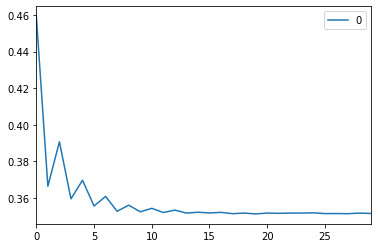

In [57]:
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [58]:
neighbors2 = KNeighborsClassifier(n_neighbors=16)
X = feature_list
Y = clean_data2['IsBadBuy']
neighbors2.fit(X_train,y_train)
y_predknn2=neighbors2.predict(X_test)

In [59]:
cross_val_score(neighbors2, X_train, y_train, cv=10)

array([0.8766882 , 0.87590527, 0.8766882 , 0.8772754 , 0.87590527,
       0.87688393, 0.876101  , 0.87688393, 0.87744714, 0.8770556 ])

In [60]:
confusion_matrix(y_test, y_predknn2)

array([[19172,    22],
       [ 2689,    12]], dtype=int64)

In [61]:
knn2_accuracy = accuracy_score(y_test, y_predknn2)*100
knn2_accuracy

87.61817766613382

Now to move on to SVC.

## SVC

Just like before, we'll train and test our model.

In [62]:
from sklearn.svm import SVC

In [63]:
svc = SVC(random_state=8)
X = feature_list
Y = clean_data2['IsBadBuy']
svc.fit(X_train,y_train)
y_predsvc=svc.predict(X_test)

In [64]:
cross_val_score(svc, X_train, y_train, cv=10)

array([0.8772754 , 0.8772754 , 0.8772754 , 0.87707966, 0.87707966,
       0.87707966, 0.87707966, 0.87707966, 0.87725137, 0.87725137])

In [65]:
confusion_matrix(y_test, y_predsvc)

array([[19194,     0],
       [ 2701,     0]], dtype=int64)

In [66]:
svc_accuracy = accuracy_score(y_test, y_predsvc)*100
svc_accuracy

87.66385019410824

## Conclusion

In [67]:
data = {'Random Forest':[clf_accuracy], 'Random Forest Tuned':[bestclf_accuracy],'KNN': [knn_accuracy],'KNN Tuned': [knn2_accuracy],'SVC': [svc_accuracy]} 
  
model_stats_compare = pd.DataFrame(data, index =['Accuracy']) 
  
model_stats_compare

,Random Forest,Random Forest Tuned,KNN,KNN Tuned,SVC
Accuracy,89.088833,89.390272,86.330212,87.618178,87.66385


When comparing the accuracy scores of the models, the tuned Random Forest model is the best performing model. However, the Random Forest model is a black box model, making it harder to intepret. Also, random forests need a lot of computing power to run.

## Future Recommendations

Some things I might try if I redid this experiment:
- Try different models, such as logistic regression
- Convert more/all of the categorical variables
- Include the BRYNO variable as a feature
- Use more computing power to tune the Random Forest model